In [65]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib as mpl

In [66]:
mpl.rcParams['axes.linewidth'] = 0.5 #set the value globally
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 8

mpl.rc('font',**{'family':'sans-serif','serif':['Arial']})
mpl.rcParams['pdf.fonttype'] = 42

In [63]:
w = 7/2 # full width 
h = w # square-ish figure

In [ ]:
def PolarHist(fig,angle,length):
    ax = fig.add_subplot(111, projection='polar')
    ax.hist2d(angle, length/np.max(length)
              , bins = 30
              , density = True
              , cmap = plt.get_cmap('cividis'))
    ax.set_theta_zero_location("N")
    ax.set_thetalim(-np.pi, np.pi)
    ax.set_rticks([0.5, 1], )  # less radial ticks
    ax.set_rlabel_position(-160)  # Move radial labels away from plotted line
    lines, labels = ax.set_thetagrids(range(-180, 180, 45))
    ax.grid(True, c = 'white')

    rlabels = ax.get_ymajorticklabels()
    for label in rlabels:
        label.set_color('pink')

In [67]:
def plotAngle(ax, time, angle):
    ax.plot(time, angle*180/np.pi)
    ax.set_ylabel('Head-Proboscis Angle \n (degree)')
    ax.set_ylim(-45, 45)
    ax.legend()

def plotProbLength(ax, time, length):
    ax.plot(time, length)
    ax.set_ylabel('Proboscis Position (cm)')
    ax.set_xlabel("Time (sec)")
    ax.legend()
    
def plotRelRadialPos(ax, time, r, xmin, xmax):
    ax.plot(time, r)
    ax.set_ylabel('Relative Radial Position')
    ax.set_ylim(0,2)
    ax.set_xlim(xmin, xmax)
    ax.legend()
    
def plotTrackPolar(ax, angle, length, color, t0, t1):
    ax = plt.subplot(projection = 'polar')
    ax.plot(angle, length
           , linewidth = 1
           , color = color)
    ax.set_theta_zero_location("N")
#     ax.set_thetalim(-np.pi/2, np.pi/2)
    ax.set_thetamin(t0)
    ax.set_thetamax(t1)

In [5]:
direc = r'./dataFolders/PaperPipelineOutput/v3/OtherBodyParts/FirstVisit/' 
output_fig_path = r"./dataFolders/PaperPipelineOutput/Figures/v3/OtherBodyPartTracks/FirstVisit/"

In [4]:
# first = ['c-1_m13', 'c-2_m20','c-3_m10', 'c-10_m11']
first = ['c-3_m7', 'c-10_m20' , 'c-10_m21', 'c-10_m22']

In [69]:
width = 5
height = 3

# set fraction of final figure for every panel
p1_height = 0.45
p1_hpad = 0.15
p1_vpad = 0.15
p2_width = 0.45

In [22]:
fig = plt.figure()

for mothID in first:
    if not os.path.exists(direc + mothID + '_probHeadAngle.csv'):
        mothID = mothID + '_cropped'
    df = pd.read_csv(direc + mothID + '_probHeadAngle.csv')
    df.head()
    
    subset = df.dropna(axis=0, how='any')
    angle = subset.ProbAngle.values
    length = subset.ProbLength.values
    
    PolarHist(fig, angle, length)
    fig.savefig(output_fig_path + mothID + '_polarHist_head.png')
    plt.clf()
    
    time = df.index.values*1/100
    angle = df.ProbAngle.values
    length = df.ProbLength.values
    
    #tracks
    fig = plt.figure(figsize=(width,height),
                 dpi = 100)
    ax0= plt.axes( [0, 0,
               0.9, p1_height] )  
    ax1= plt.axes( [0, p1_height+ p1_vpad,
               0.9, p1_height] )
    
    plotAngle(ax1, time, angle)
    plotProbLength(ax0, time, length)
    fig.savefig(output_fig_path + mothID + '_AngleLengthTrack.png',
               bbox_inches = 'tight', pad_inches = 0)
    plt.clf()
    
    #polar tracks
    fig = plt.figure(figsize=(width,height),
                 dpi = 100)
    ax0= plt.axes( [0, 0,
               1, 1] )
    plotTrackPolar(ax0, angle, length)
    fig.savefig(output_fig_path + mothID + '_AngleLengthPolarTrack_section.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

<Figure size 500x300 with 0 Axes>

# draw example track for paper

In [55]:
mothID = 'c-10_m20'

In [56]:
track = pd.read_csv('./dataFolders/PaperPipelineOutput/v3/FilteredTracks/FinalCompiledTracks/FirstVisit/' + mothID + '_FirstVisit.csv')

if not os.path.exists(direc + mothID + '_probHeadAngle.csv'):
    mothID = mothID + '_cropped'
df = pd.read_csv(direc + mothID + '_probHeadAngle.csv')

circ_params = pd.read_csv('./dataFolders/PaperPipelineOutput/CircleParameters/circle_parameters.csv')
circ_rad = circ_params.loc[circ_params.name == mothID, 'circ_radii'].values

In [57]:
# add NaN to all frames for all three variables that were problematic
removeFrames = pd.read_csv(direc + mothID + '_BadFrames.csv')
df.loc[removeFrames.FrameNumber.values, :] = np.nan

cleanFrames = removeFrames[removeFrames.FrameNumber < track.index.max()].values.squeeze()
track.loc[cleanFrames, :] = np.nan

# adjust the size of proboscis track so that it matches the angle DataFrame
extra = df.index.max() - track.index.max()
emptyFrames = np.arange(track.index.max()+1, track.index.max() + extra + 1)
emptyFrames
for idx in emptyFrames:
    track.loc[idx] = None

In [41]:
print(df[df.ProbAngle.isnull() & df.ProbLength.notnull()])

     Unnamed: 0  ProbAngle  ProbLength  HeadDirLength
2           2.0        NaN  214.718365            NaN
3           3.0        NaN  169.763573            NaN
56         56.0        NaN  140.866948            NaN
58         58.0        NaN  150.508189            NaN
60         60.0        NaN  149.427760            NaN
63         63.0        NaN  136.763845            NaN
64         64.0        NaN  126.085109            NaN
108       108.0        NaN  192.921090            NaN
109       109.0        NaN  186.867289            NaN
112       112.0        NaN  170.967615            NaN
113       113.0        NaN  158.071601            NaN
125       125.0        NaN  131.059370            NaN
127       127.0        NaN  128.741374            NaN
378       378.0        NaN  114.922602            NaN
435       435.0        NaN  134.478669            NaN
436       436.0        NaN  137.061092            NaN
437       437.0        NaN  136.642427            NaN
439       439.0        NaN  

In [74]:
track[track.r.isnull()].index.tolist()

[59,
 126,
 328,
 329,
 438,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 550,
 551,
 552,
 553,
 554,
 555,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 566,
 567,
 568,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 580,
 581,
 582,
 583,
 584,
 585,
 586,
 587,
 588,
 589,
 590,
 591,
 592,
 593,
 594,
 595,
 596,
 597,
 598,
 599,
 600,
 601,
 602,
 603,
 604,
 605,
 606,
 607,
 608,
 609,
 610,
 611,
 612,
 613,
 614,
 615,
 616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 654,
 655,
 656,
 657,
 658,
 659,
 660,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 679,
 680,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 690,

In [61]:
print(df[track.r.isnull() & df.ProbLength.notnull()])

Empty DataFrame
Columns: [Unnamed: 0, ProbAngle, ProbLength, HeadDirLength]
Index: []


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


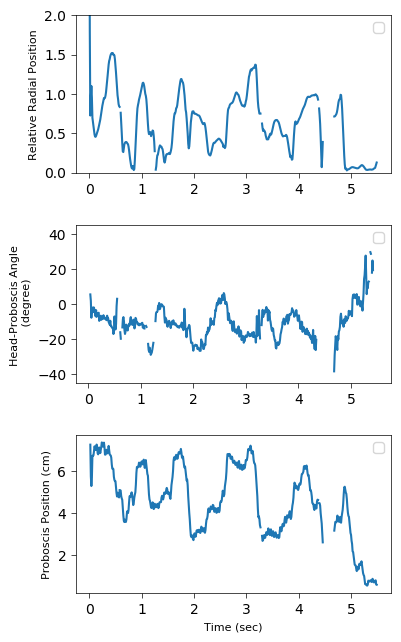

In [93]:
time = df.index.values*1/100
angle = df.ProbAngle.values
length = df.ProbLength.values* 2.5/circ_rad
r = track.r


#tracks
fig = plt.figure(figsize=(w,h),
             dpi = 100)
ax0= plt.axes( [0, 0,
           0.9, p1_height] )  
ax1= plt.axes( [0, p1_height+ p1_vpad,
           0.9, p1_height] )
ax2 = plt.axes([0, p1_height*2 + p1_vpad*2,
              0.9, p1_height] )

plotAngle(ax1, time, angle)
plotProbLength(ax0, time, length)

xmin, xmax = ax0.get_xlim()
plotRelRadialPos(ax2, time, r, xmin, xmax)
# fig.savefig(output_fig_path + mothID + '_AngleLengthTrack.pdf',
#            bbox_inches = 'tight', pad_inches = 0)
# plt.clf()

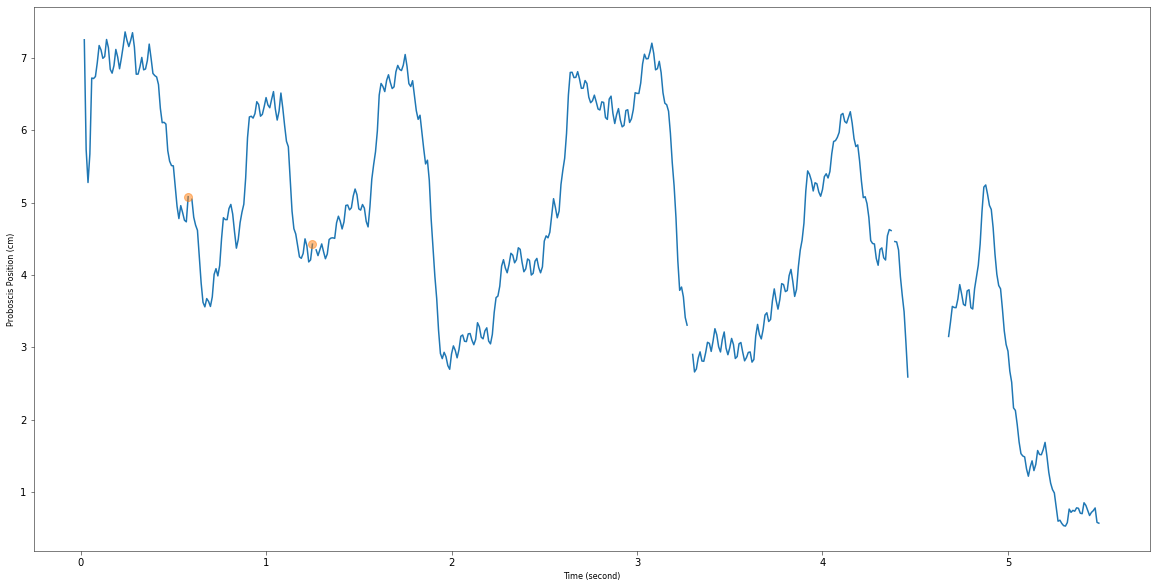

In [99]:
f = plt.figure(figsize = (20, 10))
plt.plot(time, df.ProbLength*2.5/circ_rad)
plt.plot([.58, 1.25], [df.ProbLength[58]*2.5/circ_rad,df.ProbLength[125]*2.5/circ_rad] 
         , 'o', markersize = 8, alpha = 0.5)
plt.ylabel('Proboscis Position (cm)')
plt.xlabel('Time (second)')
plt.savefig(output_fig_path + mothID + 'missingValues.png')

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\projections\polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\projections\polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


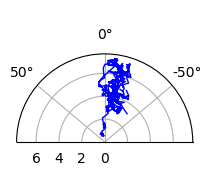

In [235]:
fig = plt.figure(figsize=(w,h/1.5),
             dpi = 100)
ax0= plt.axes( [0, 0,
           0.9, p1_height] )
# plotTrackPolar(ax0, angle, length, 'blue', 90, -90)
plotTrackPolar(ax0, angle[250:400], length[250:400], 'darkred', 50, -50)

fig.savefig(output_fig_path + mothID + '_polarTrack_full.pdf',
           bbox_inches = 'tight', pad_inches = 0)